In [24]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf


In [25]:
filename = '../data/toxicity_only.csv'

In [26]:
df = pd.read_csv(filename)

In [27]:
df

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,toxicity_annotator_count
0,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,4
1,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,4
2,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,4
3,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,4
4,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,47
5,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,105
6,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,59
7,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,4
8,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,4
9,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,4


In [28]:
X = df.drop([
    'target',
    'severe_toxicity',
    'obscene',
    'identity_attack',
    'insult', 
    'threat',
    'toxicity_annotator_count'
],axis = 1)
Y = df.drop([
    'comment_text',
    'severe_toxicity',
    'obscene',
    'identity_attack',
    'insult', 
    'threat',
    'toxicity_annotator_count'
],axis = 1)

In [29]:
X

,comment_text
0,"This is so cool. It's like, 'would you want yo..."
1,Thank you!! This would make my life a lot less...
2,This is such an urgent design problem; kudos t...
3,Is this something I'll be able to install on m...
4,haha you guys are a bunch of losers.
5,ur a sh*tty comment.
6,hahahahahahahahhha suck it.
7,FFFFUUUUUUUUUUUUUUU
8,The ranchers seem motivated by mostly by greed...
9,It was a great show. Not a combo I'd of expect...


In [30]:
Y

,target
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.893617
5,0.666667
6,0.457627
7,0.000000
8,0.000000
9,0.000000


In [31]:
import re
def tokenize(data):
    tokens = []
    for sen in data:
        sen = sen.lower()
        raw_word_tokens = re.findall(r'(?:\w+)', sen ,flags = re.U)
        word_tokens = [w for w in raw_word_tokens]
        tokens.append(word_tokens)
    return tokens

In [32]:
X_tokens = tokenize(X['comment_text'])

In [33]:
X_tokens

[['this',
  'is',
  'so',
  'cool',
  'it',
  's',
  'like',
  'would',
  'you',
  'want',
  'your',
  'mother',
  'to',
  'read',
  'this',
  'really',
  'great',
  'idea',
  'well',
  'done'],
 ['thank',
  'you',
  'this',
  'would',
  'make',
  'my',
  'life',
  'a',
  'lot',
  'less',
  'anxiety',
  'inducing',
  'keep',
  'it',
  'up',
  'and',
  'don',
  't',
  'let',
  'anyone',
  'get',
  'in',
  'your',
  'way'],
 ['this',
  'is',
  'such',
  'an',
  'urgent',
  'design',
  'problem',
  'kudos',
  'to',
  'you',
  'for',
  'taking',
  'it',
  'on',
  'very',
  'impressive'],
 ['is',
  'this',
  'something',
  'i',
  'll',
  'be',
  'able',
  'to',
  'install',
  'on',
  'my',
  'site',
  'when',
  'will',
  'you',
  'be',
  'releasing',
  'it'],
 ['haha', 'you', 'guys', 'are', 'a', 'bunch', 'of', 'losers'],
 ['ur', 'a', 'sh', 'tty', 'comment'],
 ['hahahahahahahahhha', 'suck', 'it'],
 ['ffffuuuuuuuuuuuuuuu'],
 ['the',
  'ranchers',
  'seem',
  'motivated',
  'by',
  'mostly',
 

In [34]:
from gensim.models import Word2Vec
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [35]:
model = Word2Vec(X_tokens, min_count=1)

In [36]:
words = list(model.wv.vocab)

In [37]:
model.save('model.bin')

In [38]:
print(model)

Word2Vec(vocab=330241, size=100, alpha=0.025)


In [39]:
X = model[model.wv.vocab]

/Users/amyjchen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [40]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

UnicodeDecodeError: 'utf8' codec can't decode byte 0xe2 in position 2: unexpected end of data

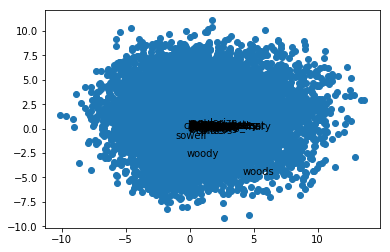

In [42]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word.decode('utf-8'), xy=(result[i, 0], result[i, 1]))
pyplot.show()